In [1]:
!kaggle datasets download -d varsharam/walmart-sales-dataset-of-45stores


Dataset URL: https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores
License(s): unknown
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 91.6MB/s]


In [2]:
!unzip walmart-sales-dataset-of-45stores.zip


Archive:  walmart-sales-dataset-of-45stores.zip
  inflating: walmart-sales-dataset-of-45stores.csv  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [4]:
import pandas as pd

# Adjust the file name as necessary
df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')
df.head()


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
#let's check for missing values

pd.DataFrame(df.isnull().sum(),columns=['Missing Values'])
 #There are no missing values

Missing Values
Store                      0
Date                       0
Weekly_Sales               0
Holiday_Flag               0
Temperature                0
Fuel_Price                 0
CPI                        0
Unemployment               0

# **STATISTICAL INFORMATION**

In [6]:
#Now , let's check some statistical informations about the data

round(df.describe(),2)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price      CPI  \
count  6435.00       6435.00       6435.00      6435.00     6435.00  6435.00   
mean     23.00    1046964.88          0.07        60.66        3.36   171.58   
std      12.99     564366.62          0.26        18.44        0.46    39.36   
min       1.00     209986.25          0.00        -2.06        2.47   126.06   
25%      12.00     553350.10          0.00        47.46        2.93   131.74   
50%      23.00     960746.04          0.00        62.67        3.44   182.62   
75%      34.00    1420158.66          0.00        74.94        3.74   212.74   
max      45.00    3818686.45          1.00       100.14        4.47   227.23   

       Unemployment  
count       6435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# let's explore each column , one by one
df["Store"].unique()
#looks like there are 45 different stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

# **DISTRIBUTION OF WEEKLY SALE**

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


<Axes: ylabel='Frequency'>

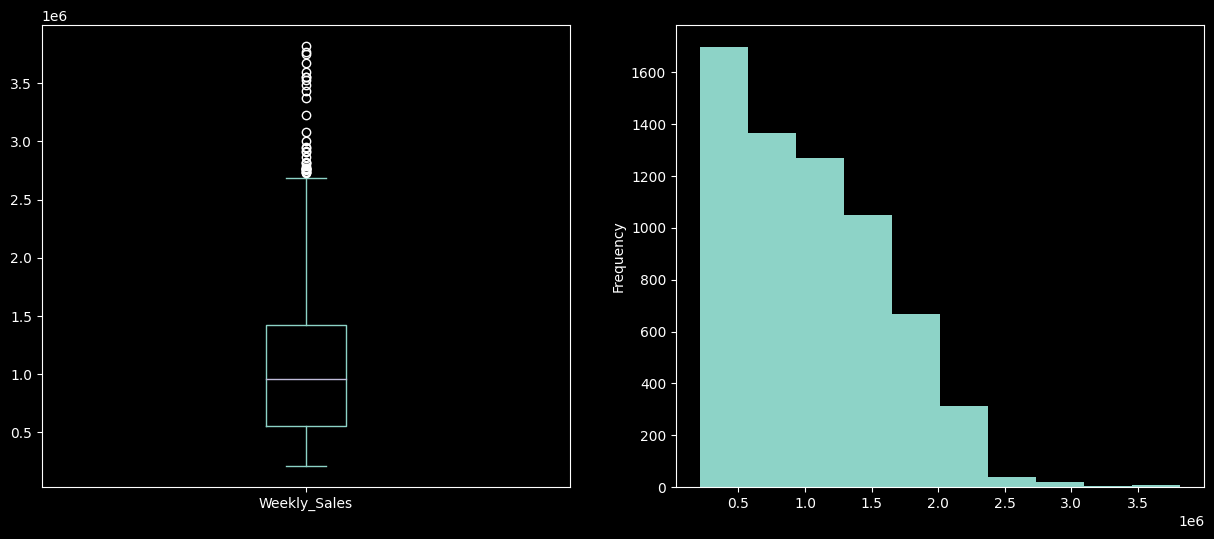

In [9]:
print(df["Weekly_Sales"].describe())
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df["Weekly_Sales"].plot(kind='box')
plt.subplot(1,2,2)
df["Weekly_Sales"].plot(kind='hist')




#sns.boxplot(df["Weekly_Sales"])


The above diagram shows a skew right distribution meaning:


the mean is greater than the median.


the median is greater than the mode.


This hows that the data contains outliers


and skewness in the data





In [10]:
fig = px.box(df, y = 'Weekly_Sales')
fig.show()

<ipython-input-11-5abc52fb8db2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-11-5abc52fb8db2>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



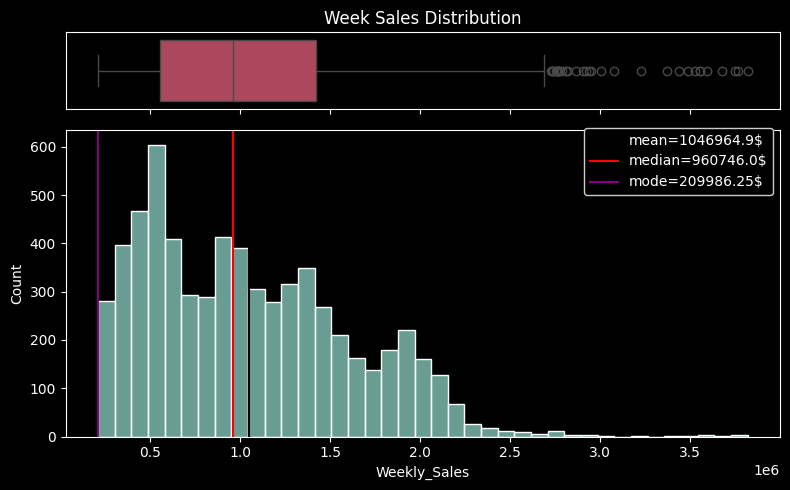

In [11]:
import numpy as np
from scipy import stats
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0],palette="inferno")
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1],palette="cividis")
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'Black', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

num_plot(df, 'Weekly_Sales', 'Week Sales Distribution','$')



1.   Median sales : $960k


2.   Mean Sales : $1M



In [12]:

# Convert the Date column to
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y", dayfirst=True)

# Extract year, month, and day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df.head()
df1=df.copy()

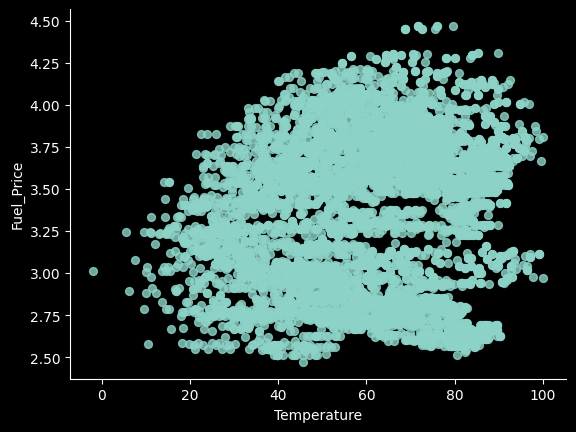

In [13]:
# @title Temperature vs Fuel_Price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Fuel_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

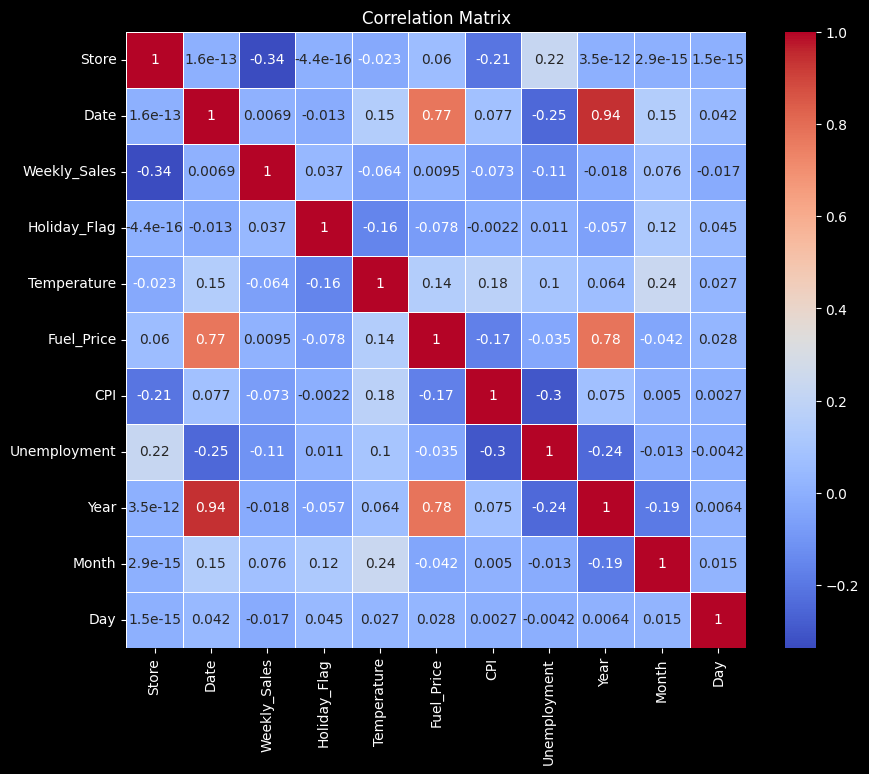

In [14]:
dfcorrelation_matrix = df.corr()
dfcorrelation_matrix = df.corr()
dfcorrelation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dfcorrelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Interpreting the correlation matrix involves looking at the correlation

values between Weekly_Sales and other factors in the dataset. Correlation

values range from -1 to 1, where:

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

*Let's interpret the key correlations with Weekly_Sales from your heatmap:*

Here is a summarized interpretation of the correlations with weekly sales:

- **Store**: Moderate negative correlation (-0.34) suggests different sales patterns across stores.
- **Date**: Very weak positive correlation (0.0069) indicates minimal change in sales over time.
- **Holiday_Flag**: Very weak positive correlation (0.037) suggests holidays slightly increase sales.
- **Temperature**: Very weak negative correlation (-0.064) indicates minimal impact of temperature on sales.
- **Fuel_Price**: Very weak positive correlation (0.0095) shows little to no impact of fuel prices on sales.
- **CPI (Consumer Price Index)**: Weak negative correlation (-0.073) suggests a slight decrease in sales as CPI increases.
- **Unemployment**: Weak negative correlation (-0.11) indicates a slight decrease in sales with higher unemployment rates.
- **Year**: Very weak negative correlation (-0.018) suggests sales do not vary significantly over the years.

Key Takeaways
The correlations between Weekly_Sales and other variables are generally weak, indicating that none of the variables in the dataset have a strong linear relationship with weekly sales.
The strongest correlation with Weekly_Sales is the negative correlation with Store (-0.34), suggesting that store-specific factors might influence sales, but this relationship is not strong.
Other factors like Holiday_Flag, Temperature, Fuel_Price, CPI, and Unemployment have very weak correlations with weekly sales, indicating minimal linear influence on sales.

In [15]:
df["Month"].value_counts()

Month
4     630
7     630
6     585
3     585
10    585
9     585
8     585
2     540
5     540
12    450
11    360
1     360
Name: count, dtype: int64

In [16]:
def change_month_name(month):
    if month == 1:
        return "January"
    elif month == 2:
        return "February"
    elif month == 3:
        return "March"
    elif month == 4:
        return "April"
    elif month == 5:
        return "May"
    elif month == 6:
        return "June"
    elif month == 7:
        return "July"
    elif month == 8:
        return "August"
    elif month == 9:
        return "September"
    elif month == 10:
        return "October"
    elif month == 11:
        return "November"
    elif month == 12:
        return "December"

df["Month"] = df["Month"].apply(change_month_name)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year     Month  Day  
0  211.096358         8.106  2010  February    5  
1  211.242170         8.106  2010  February   12  
2  211.289143         8.106  2010  February   19  
3  211.319643         8.106  2010  February   26  
4  211.350143         8.106  2010     March    5

In [17]:
df["Day of the week"]= df["Date"].dt.day_name()

In [18]:
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [19]:
total_sales_by_year = df.groupby("Year")["Weekly_Sales"].sum()
total_sales_by_year

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Year'>

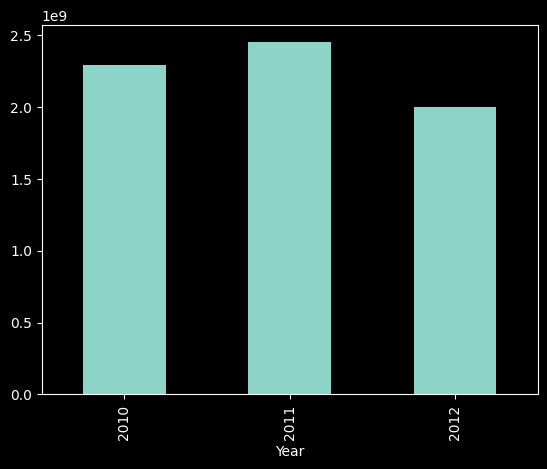

In [20]:
total_sales_by_year.plot(kind='bar')

In [21]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year     Month  Day Day of the week  
0  211.096358         8.106  2010  February    5          Friday  
1  211.242170         8.106  2010  February   12          Friday  
2  211.289143         8.106  2010  February   19          Friday  
3  211.319643         8.106  2010  February   26          Friday  
4  211.350143         8.106  2010     March    5          Friday

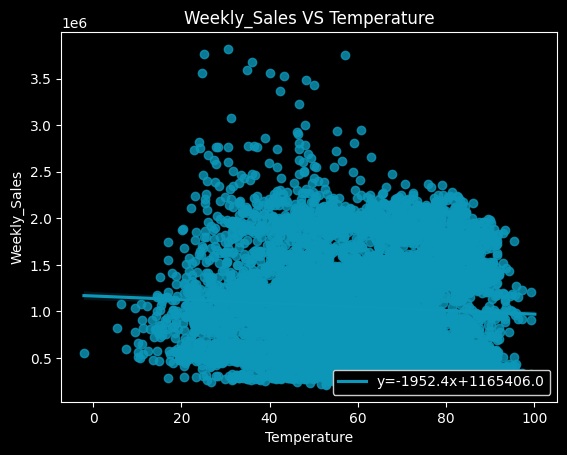

In [22]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
slope, intercept = lr_plot(df,'Temperature','Weekly_Sales', 'lower right')

<Axes: title={'center': 'Sum of Weekly Sales by Store'}, xlabel='Store', ylabel='Weekly Sales'>

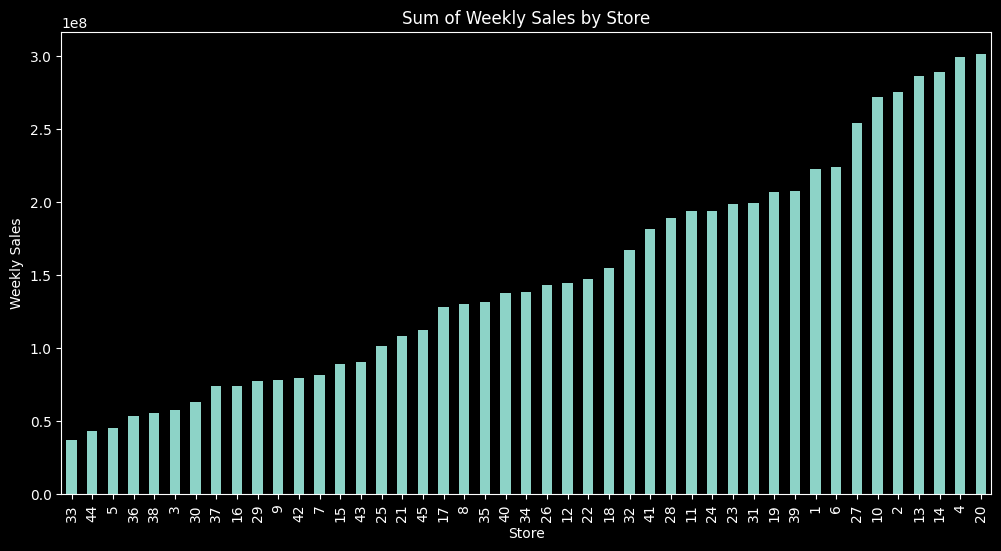

In [23]:
plt.figure(figsize=(12, 6))
store_sale = df.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Sum of Weekly Sales by Store')
store_sale

<Axes: title={'center': 'Average Weekly Sales by Store'}, xlabel='Store', ylabel='Weekly Sales'>

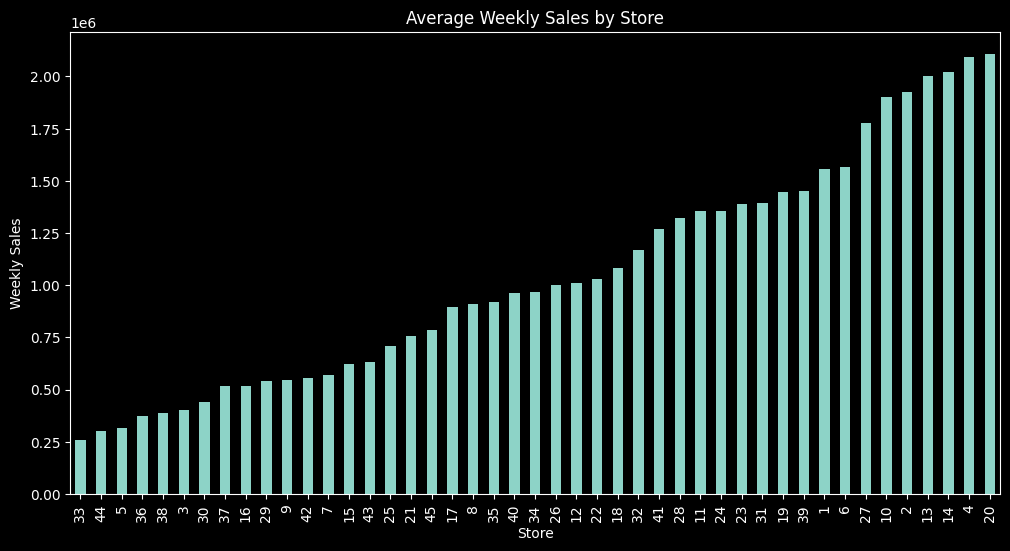

In [24]:
plt.figure(figsize=(12, 6))
store_sale = df.groupby('Store')['Weekly_Sales'].mean().sort_values().plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Average Weekly Sales by Store')
store_sale

Variation in Sales Across Stores:

There is a significant variation in weekly sales across different stores.
Store 20 has the highest average weekly sales, exceeding 2 million, while Store 33 has the lowest average weekly sales, under 0.25 million.


Sales distribution

There is a noticeable gap between the highest and lowest performing stores, suggesting disparities in store performance.


# OBSERVATIONS FROM STORE 20

In [57]:
df_store_20=df[(df['Store'] == 20) & (df['Weekly_Sales'] > 2000000)]
df_store_20.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2717     20 2010-02-05    2401395.47             0        25.92       2.784   
2718     20 2010-02-12    2109107.90             1        22.12       2.773   
2719     20 2010-02-19    2161549.76             0        25.43       2.745   
2721     20 2010-03-05    2119213.72             0        31.75       2.777   
2722     20 2010-03-12    2010974.84             0        43.82       2.818   

             CPI  Unemployment  Year     Month Day of the week  
2717  204.247194         8.187  2010  February          Friday  
2718  204.385747         8.187  2010  February          Friday  
2719  204.432100         8.187  2010  February          Friday  
2721  204.494073         8.187  2010     March          Friday  
2722  204.525060         8.187  2010     March          Friday

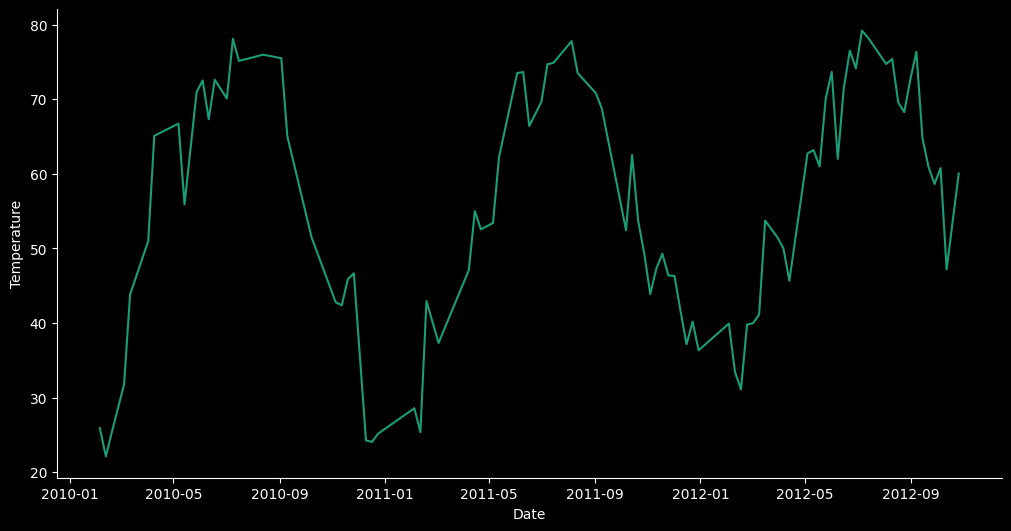

In [58]:
# @title Date vs Temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_store_20.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Temperature')

In [ ]:
df_store_20=df[(df['Store'] == 20) & (df['Weekly_Sales'] > 2000000)]
df_store_20.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2717     20 2010-02-05    2401395.47             0        25.92       2.784   
2718     20 2010-02-12    2109107.90             1        22.12       2.773   
2719     20 2010-02-19    2161549.76             0        25.43       2.745   
2721     20 2010-03-05    2119213.72             0        31.75       2.777   
2722     20 2010-03-12    2010974.84             0        43.82       2.818   

             CPI  Unemployment  Year     Month Day of the week  
2717  204.247194         8.187  2010  February          Friday  
2718  204.385747         8.187  2010  February          Friday  
2719  204.432100         8.187  2010  February          Friday  
2721  204.494073         8.187  2010     March          Friday  
2722  204.525060         8.187  2010     March          Friday

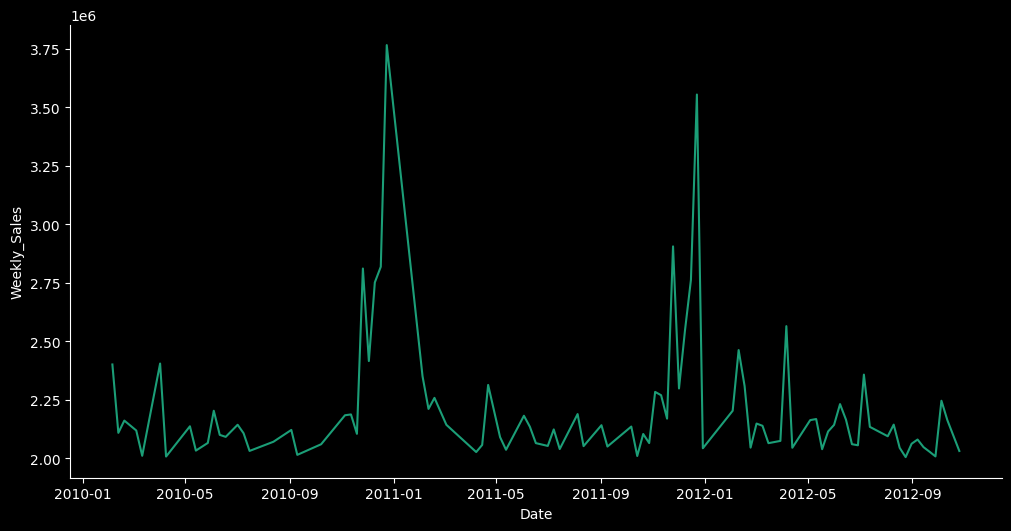

In [55]:
# @title Date vs Weekly_Sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Weekly_Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_store_20.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Weekly_Sales')

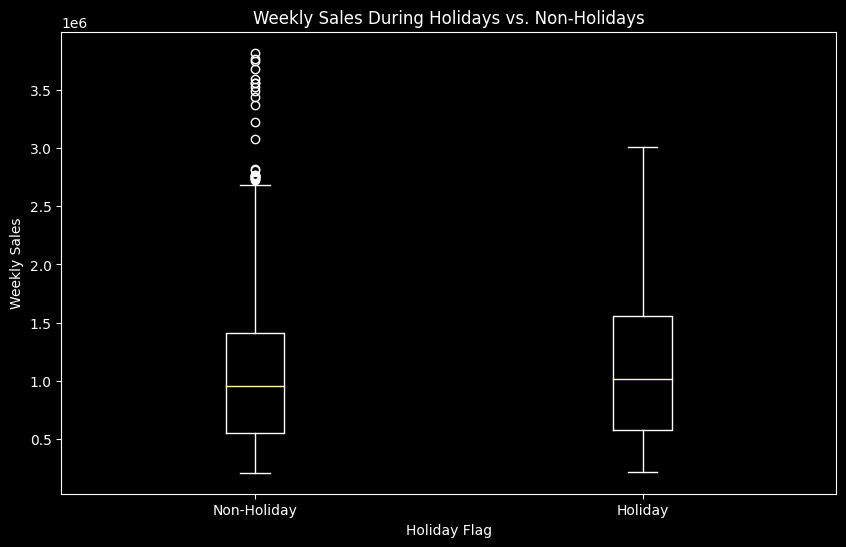

In [54]:
# @title Weekly Sales During Holidays vs. Non-Holidays

import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Holiday_Flag'] == 0]['Weekly_Sales'], df[df['Holiday_Flag'] == 1]['Weekly_Sales']], labels=['Non-Holiday', 'Holiday'])
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
_ = plt.title('Weekly Sales During Holidays vs. Non-Holidays')


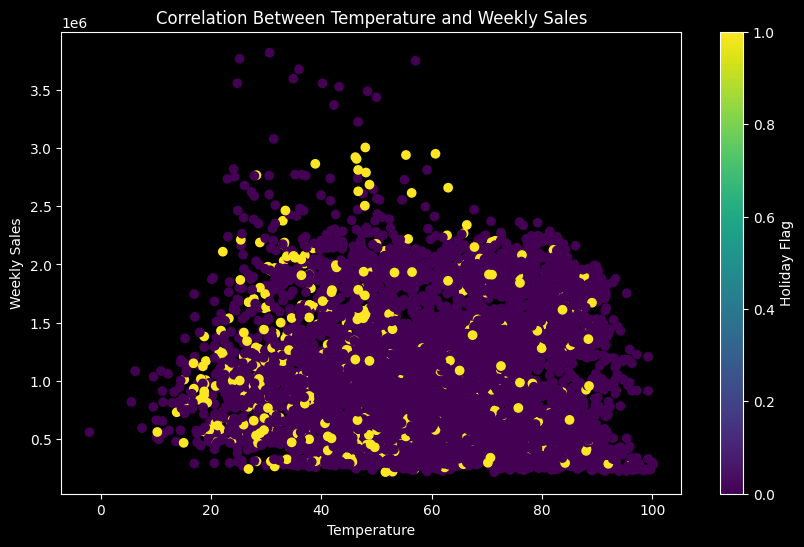

In [53]:
# @title Correlation Between Temperature and Weekly Sales

import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
plt.figure(figsize=(10, 6))

plt.scatter(df['Temperature'], df['Weekly_Sales'], c=df['Holiday_Flag'], cmap='viridis')

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Correlation Between Temperature and Weekly Sales')
_ = plt.colorbar(label='Holiday Flag')


<Axes: >

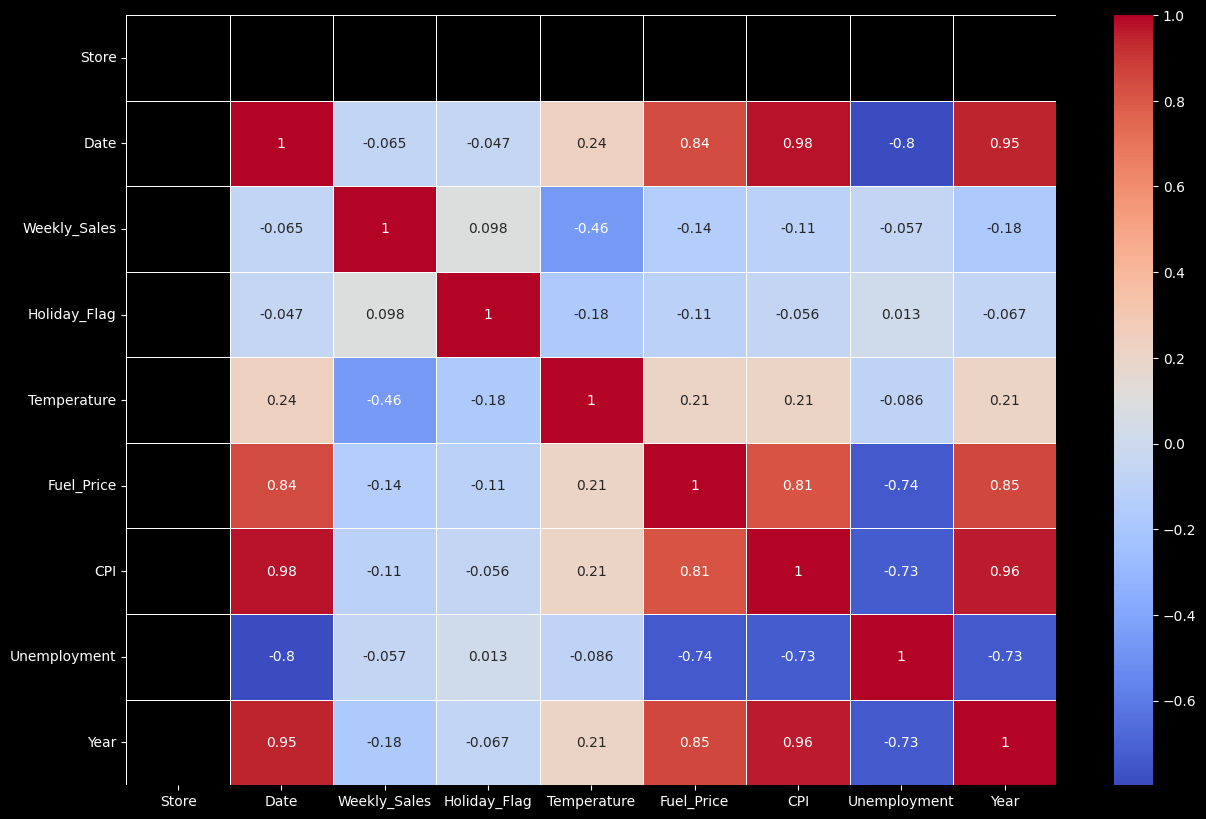

In [26]:

dfcorrelation_matrix = df_store_20.iloc[0:,0:-3].corr()
dfcorrelation_matrix
plt.figure(figsize=(15, 10))
sns.heatmap(dfcorrelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

CPI & Fuel price partially influenced the weekly sales in store 2
Aslo , the year aso partially influenced it

Temperature some waht afftected it with a negative correlation of -0.46

# OBSERVATIONS FROM STORE 33


In [27]:
df_store_33=df[(df['Store'] == 33) & (df['Weekly_Sales'] < 0.25*(10**6))]
df_store_33.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4601     33 2010-07-30     242047.03             0        92.71       3.017   
4604     33 2010-08-20     230519.49             0        96.46       3.041   
4605     33 2010-08-27     224031.19             0        94.00       3.022   
4606     33 2010-09-03     237405.82             0        90.82       3.087   
4608     33 2010-09-17     246277.18             0        89.43       3.028   

             CPI  Unemployment  Year      Month  Day Day of the week  
4601  126.106903         9.495  2010       July   30          Friday  
4604  126.076645         9.495  2010     August   20          Friday  
4605  126.089290         9.495  2010     August   27          Friday  
4606  126.101935         9.495  2010  September    3          Friday  
4608  126.145467         9.495  2010  September   17          Friday

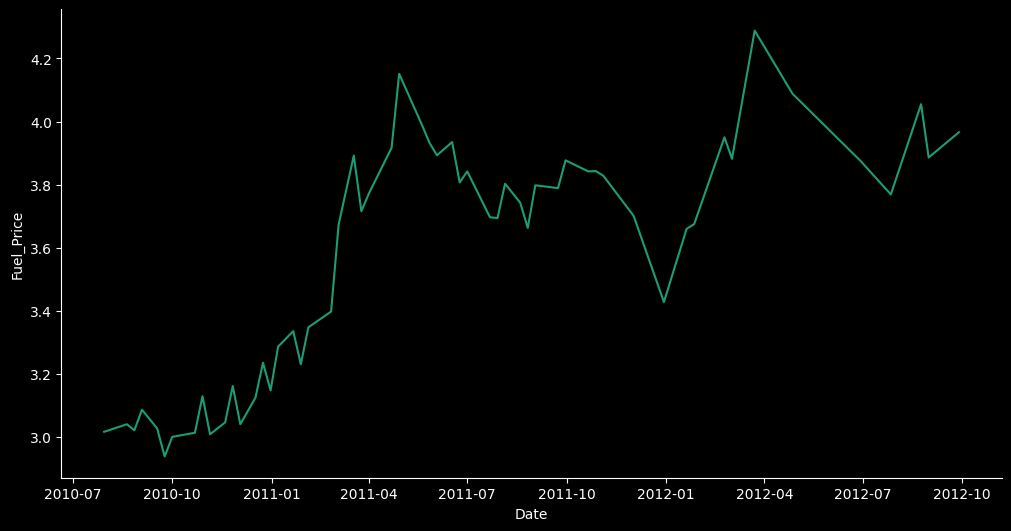

In [60]:
# @title Date vs Fuel_Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Fuel_Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_store_33.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Fuel_Price')

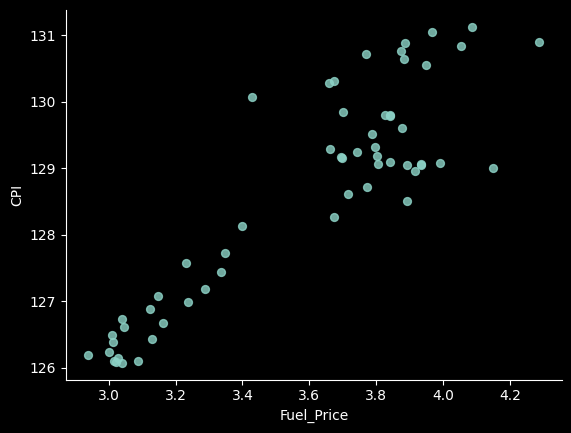

In [59]:
# @title Fuel_Price vs CPI

from matplotlib import pyplot as plt
df_store_33.plot(kind='scatter', x='Fuel_Price', y='CPI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

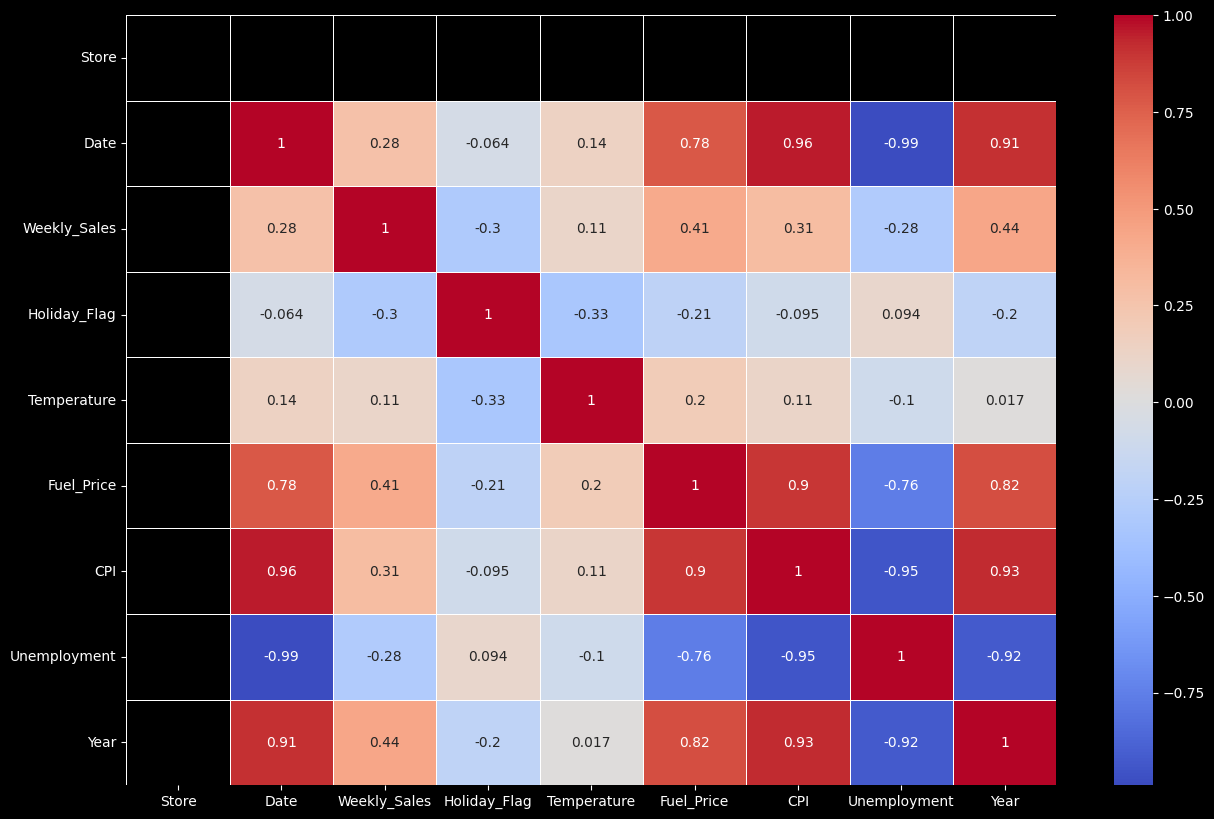

In [28]:

dfcorrelation_matrix = df_store_33.iloc[0:,0:-3].corr()
dfcorrelation_matrix
plt.figure(figsize=(15, 10))
sns.heatmap(dfcorrelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

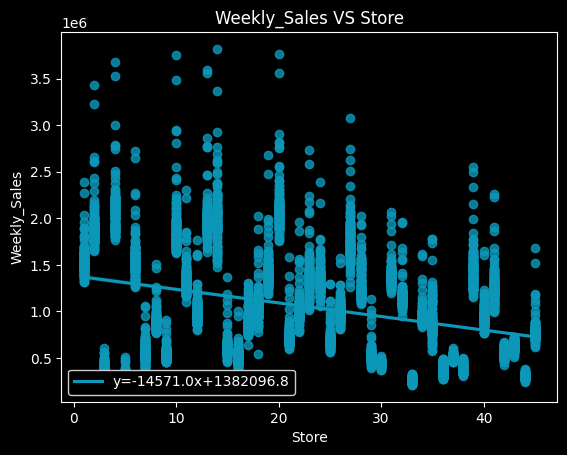

In [29]:
# @title Store vs Weekly_Sales

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
slope, intercept = lr_plot(df,'Store','Weekly_Sales', 'lower left')

In [30]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year     Month  Day Day of the week  
0  211.096358         8.106  2010  February    5          Friday  
1  211.242170         8.106  2010  February   12          Friday  
2  211.289143         8.106  2010  February   19          Friday  
3  211.319643         8.106  2010  February   26          Friday  
4  211.350143         8.106  2010     March    5          Friday

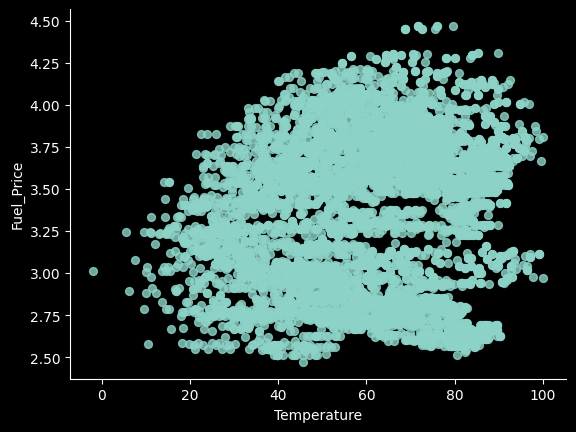

In [31]:
# @title Temperature vs Fuel_Price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Fuel_Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

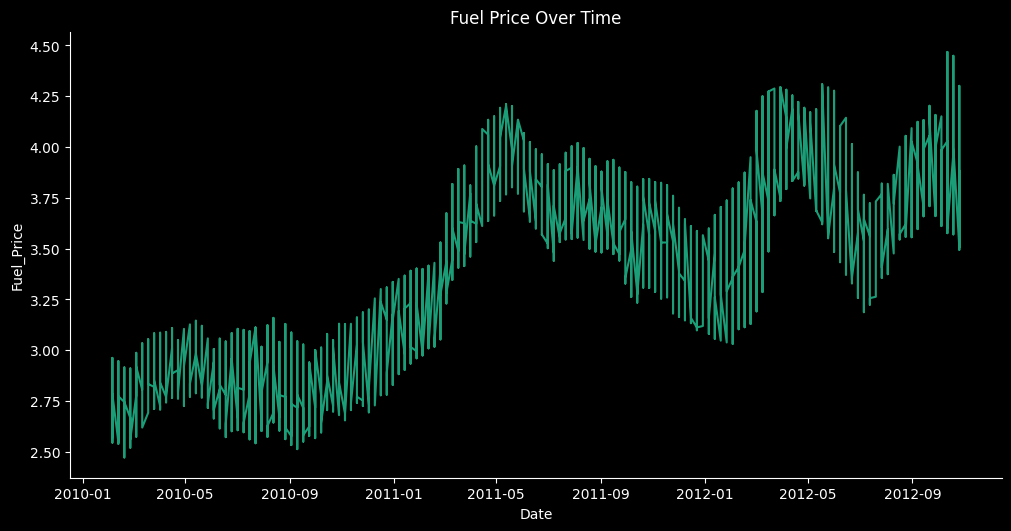

In [32]:
# @title Date vs Fuel_Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Fuel_Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.title('Fuel Price Over Time')
_ = plt.ylabel('Fuel_Price')

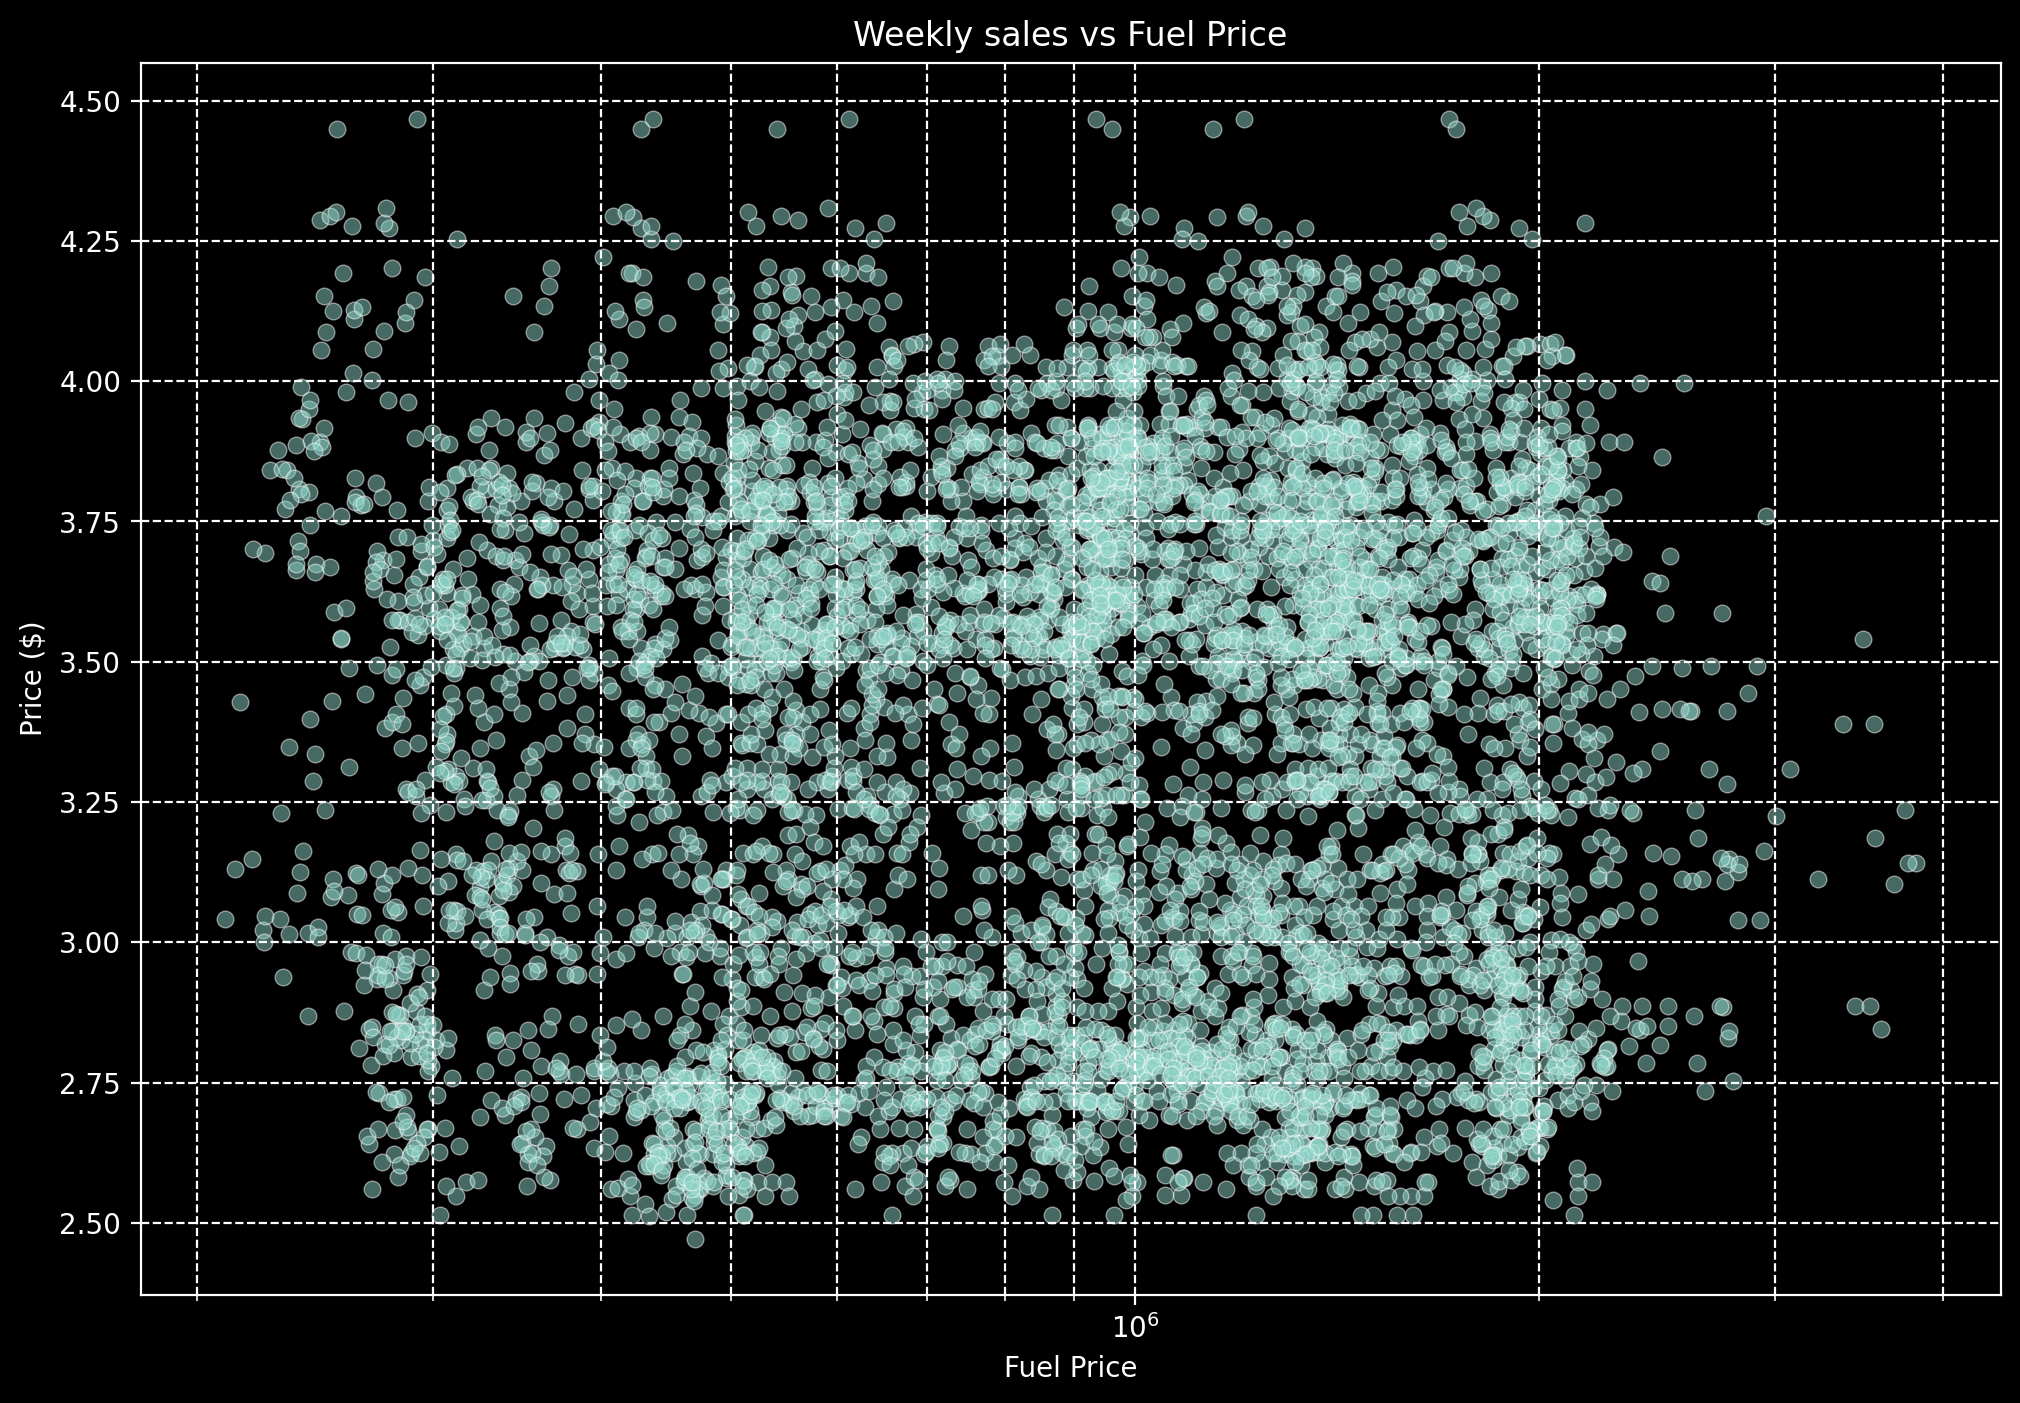

In [33]:
# @title Store vs Weekly_Sales


plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='Weekly_Sales', y='Fuel_Price', data=df, alpha=0.5)
plt.title('Weekly sales vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Price ($)')
plt.xscale('log')  # Using a logarithmic scale for better visualization of a wide range of prices
plt.grid(True, which="both", ls="--")
plt.show()


In [34]:
df.drop(['Day'], axis=1, inplace=True)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year     Month Day of the week  
0  211.096358         8.106  2010  February          Friday  
1  211.242170         8.106  2010  February          Friday  
2  211.289143         8.106  2010  February          Friday  
3  211.319643         8.106  2010  February          Friday  
4  211.350143         8.106  2010     March          Friday

In [35]:
Holiday = df.groupby("Holiday_Flag")["Weekly_Sales"].sum()
Holiday

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

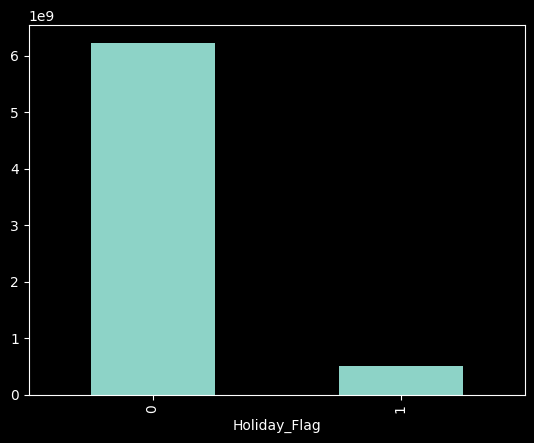

In [36]:
Holiday.plot(kind="bar")
plt.show()


In [37]:
df["Unemployment"].nunique()

349

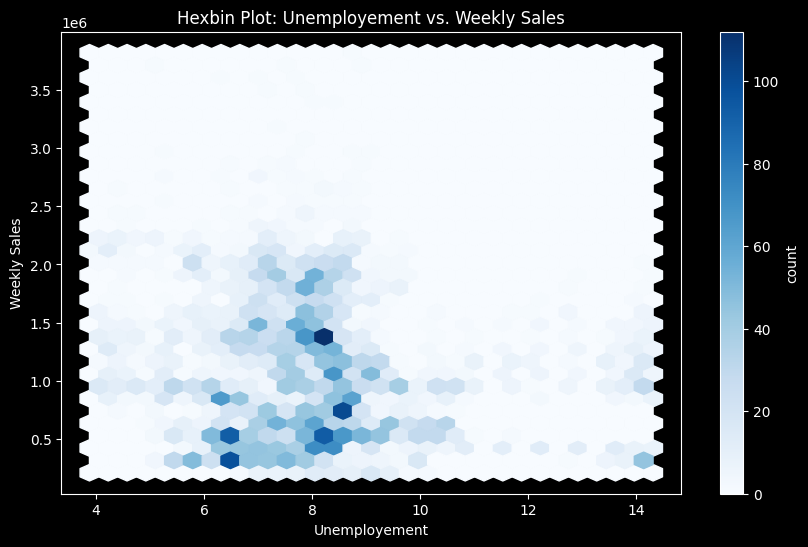

In [38]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Unemployment'], df['Weekly_Sales'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count')
plt.xlabel('Unemployement')
plt.ylabel('Weekly Sales')
plt.title('Hexbin Plot: Unemployement vs. Weekly Sales')
plt.show()

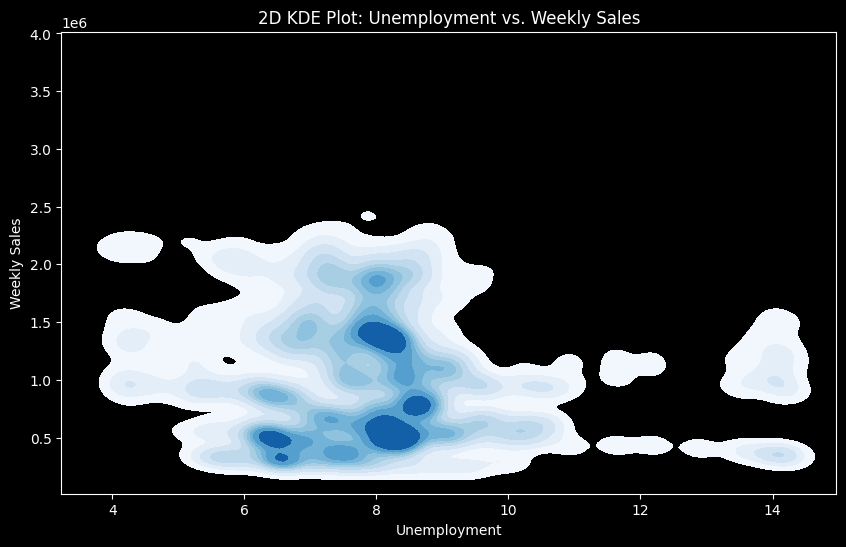

In [39]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Unemployment'], y=df['Weekly_Sales'], cmap="Blues", fill=True, bw_adjust=.5)
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('2D KDE Plot: Unemployment vs. Weekly Sales')
plt.show()

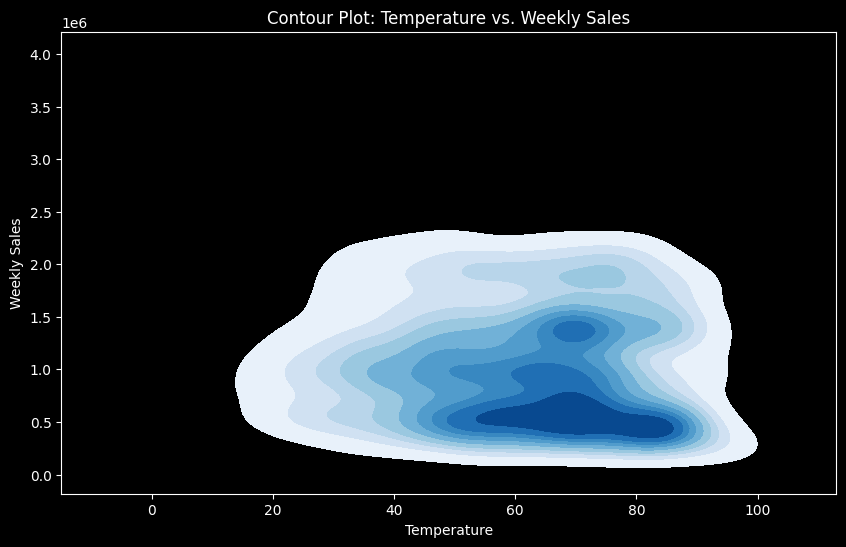

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Temperature'], y=df['Weekly_Sales'], cmap="Blues", fill=True)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Contour Plot: Temperature vs. Weekly Sales')
plt.show()


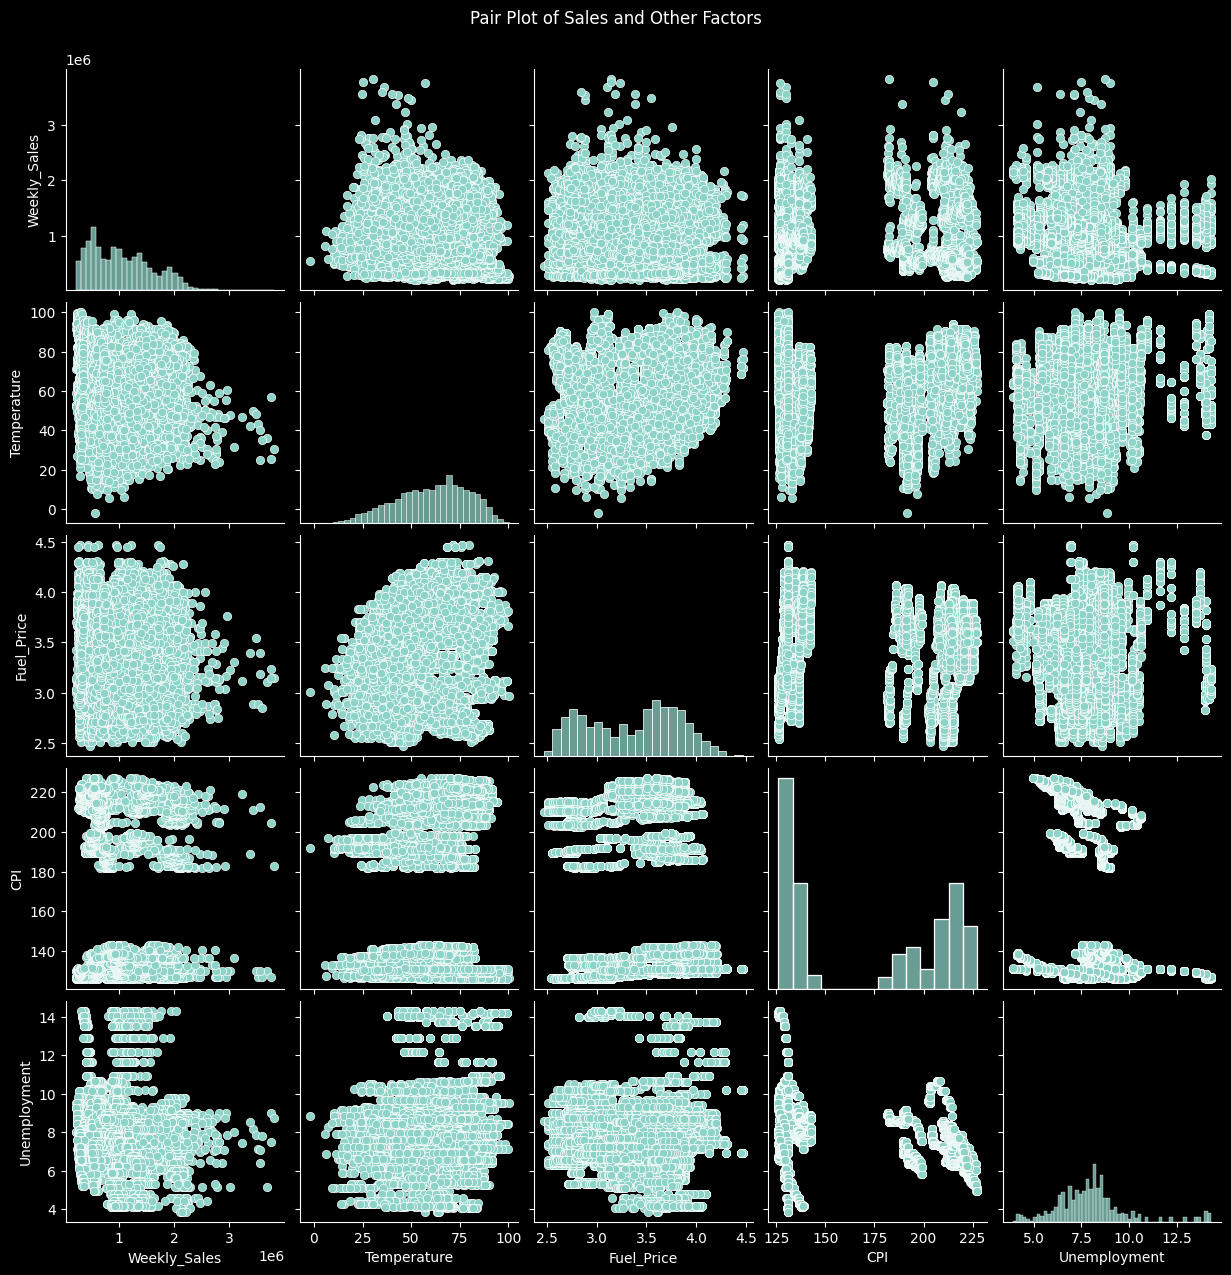

In [41]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.suptitle('Pair Plot of Sales and Other Factors', y=1.02)
plt.show()


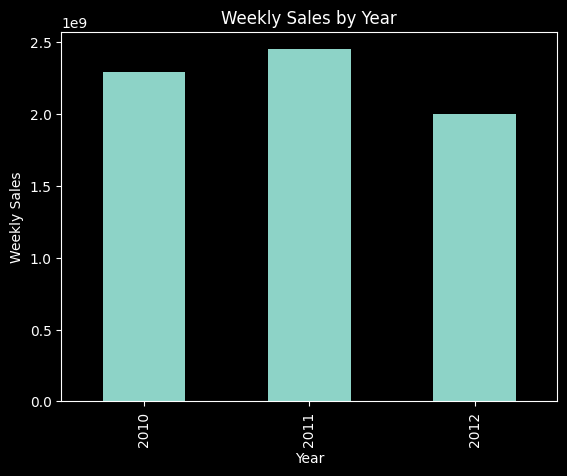

In [42]:
df.groupby('Year')['Weekly_Sales'].sum()
df.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Year')
plt.show()



In [43]:
df1.iloc[0:,0:-1]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  
0     211.096358         8.106  2010      2  
1     211.242170         8.106  2010      2  
2     211.289143         8.106  2010      2  
3     211.319643         8.106  2010      2  
4     211.350143         8.106  2010      3  
...          ...           ...   ...    ...  
6430  192.013558         8.684  2012      9  
6431  192.170412         8.667  2012     10  
6432  192.327265         8.667  2012     10  
6433  192.330854         8.667  2012     10  
6434  192.308899         8.667  2012     10  

[6435 rows x 10 columns]

In [44]:
#let's account for the increae in sales in 2011
df_2011=df1[df1["Year"]==2011]
df_2011.head()


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
48      1 2011-01-07    1444732.28             0        48.27       2.976   
49      1 2011-01-14    1391013.96             0        35.40       2.983   
50      1 2011-01-21    1327405.42             0        44.04       3.016   
51      1 2011-01-28    1316899.31             0        43.83       3.010   
52      1 2011-02-04    1606629.58             0        42.27       2.989   

           CPI  Unemployment  Year  Month  Day  
48  211.404742         7.742  2011      1    7  
49  211.457411         7.742  2011      1   14  
50  211.827234         7.742  2011      1   21  
51  212.197058         7.742  2011      1   28  
52  212.566881         7.742  2011      2    4

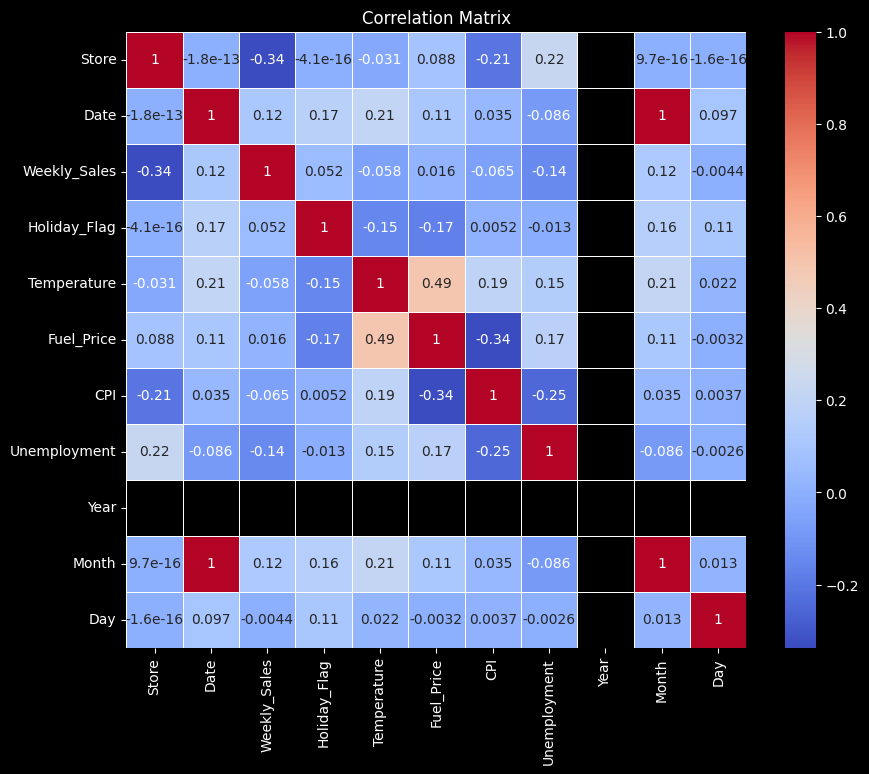

In [45]:
dfcorrelation_matrix = df_2011.corr()
dfcorrelation_matrix = df_2011.corr()
dfcorrelation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dfcorrelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
df_2011=df[df["Year"]==2011]
df_2011.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
48      1 2011-01-07    1444732.28             0        48.27       2.976   
49      1 2011-01-14    1391013.96             0        35.40       2.983   
50      1 2011-01-21    1327405.42             0        44.04       3.016   
51      1 2011-01-28    1316899.31             0        43.83       3.010   
52      1 2011-02-04    1606629.58             0        42.27       2.989   

           CPI  Unemployment  Year     Month Day of the week  
48  211.404742         7.742  2011   January          Friday  
49  211.457411         7.742  2011   January          Friday  
50  211.827234         7.742  2011   January          Friday  
51  212.197058         7.742  2011   January          Friday  
52  212.566881         7.742  2011  February          Friday

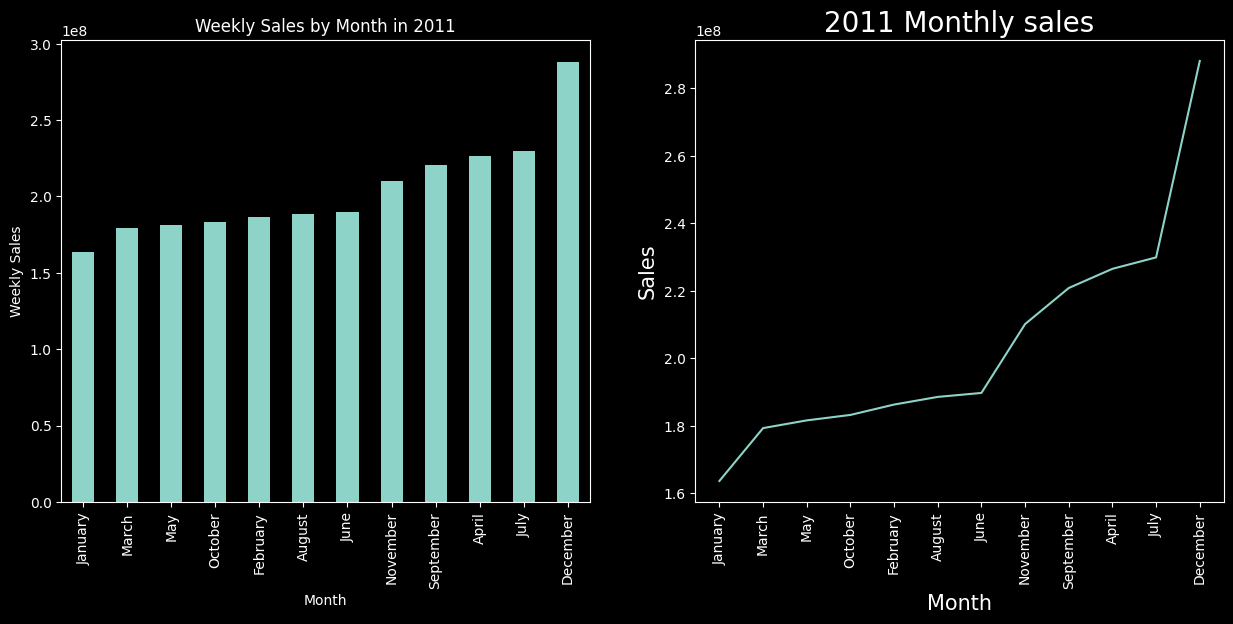

In [47]:
df_2011_grouped=df_2011.groupby('Month')['Weekly_Sales'].sum().sort_values()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df_2011_grouped.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Month in 2011')


plt.subplot(1,2,2)
df_2011=pd.DataFrame(df_2011_grouped)
df_2011.reset_index(inplace=True)
df_2011.head()

#plt.style.use('dark_background')

sns.lineplot(data=df_2011,x='Month',y='Weekly_Sales')
plt.title('2011 Monthly sales',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.xticks(rotation = 90)
plt.ylabel('Sales',fontsize=15)
plt.show()

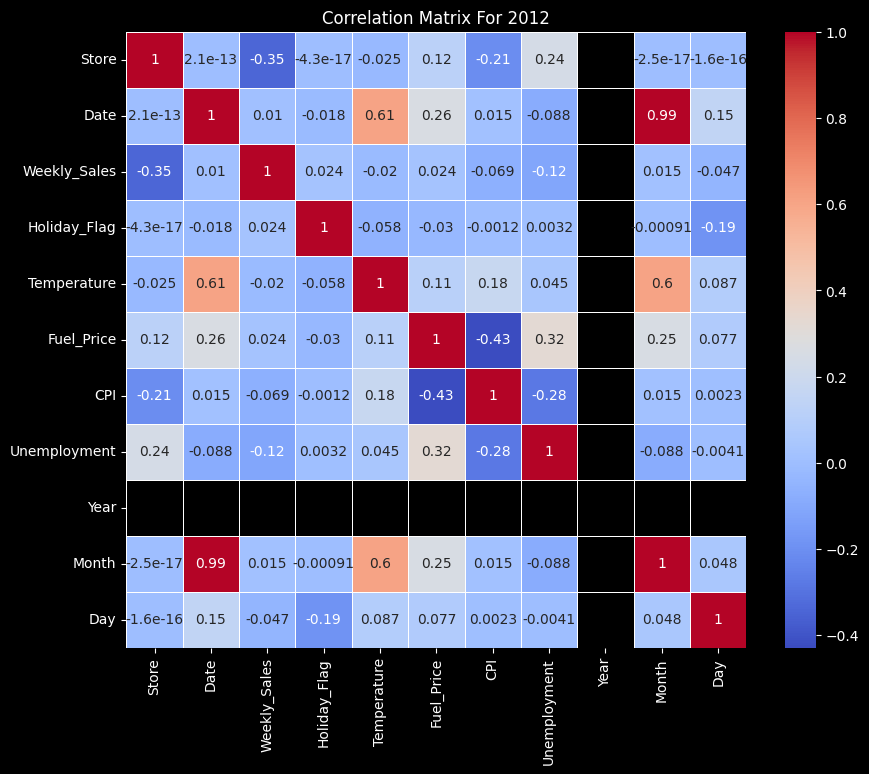

In [48]:
#let's account for the decreae in sales in 2011
df_2012=df1[df1["Year"]==2012]
dfcorrelation_matrix = df_2012.corr()
dfcorrelation_matrix = df_2012.corr()
dfcorrelation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dfcorrelation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix For 2012')
plt.show()


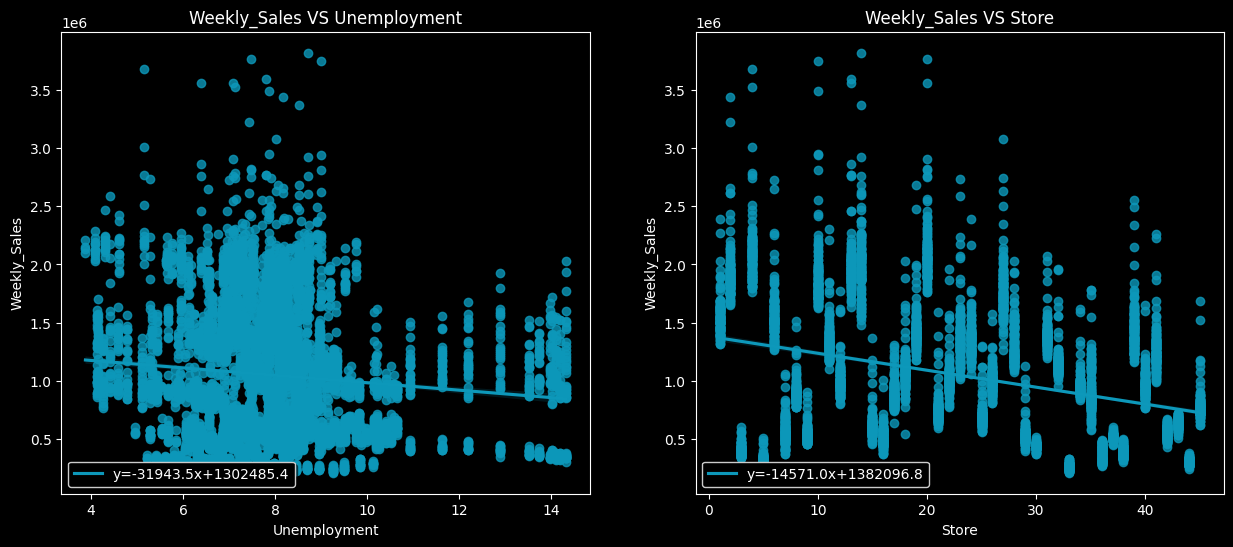

In [49]:
# @title Store vs Weekly_Sales

def lr_plot(df, col_x, col_y, leg):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
  sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
  plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
  plt.title(col_y + ' VS ' + col_x)
  return slope, intercept
slope, intercept = lr_plot(df,'Unemployment','Weekly_Sales', 'lower left')


def lr_plot(df, col_x, col_y, leg):
  plt.subplot(1,2,2)
  slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
  sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
  plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
  plt.title(col_y + ' VS ' + col_x)
  plt.show()
  return slope, intercept
slope, intercept = lr_plot(df,'Store','Weekly_Sales', 'lower left')

In [50]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month',
       'Day of the week'],
      dtype='object')

In [51]:

new_2011=df[df["Year"]==2011][["Weekly_Sales","Unemployment","Month"]]
new_2011.head()

Weekly_Sales  Unemployment     Month
48    1444732.28         7.742   January
49    1391013.96         7.742   January
50    1327405.42         7.742   January
51    1316899.31         7.742   January
52    1606629.58         7.742  February

In [52]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year     Month Day of the week  
0  211.096358         8.106  2010  February          Friday  
1  211.242170         8.106  2010  February          Friday  
2  211.289143         8.106  2010  February          Friday  
3  211.319643         8.106  2010  February          Friday  
4  211.350143         8.106  2010     March          Friday